In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz
from IPython.display import display, Markdown

In [2]:
states = [0,2,1]
initState = 0
inAlphabet = [0,1,2,4,3]
outAlphabet = [0,1,2]
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction = [ [0,0,1], [1,0,1], [1,1,2], [1,2,0], [2,2,0], [3,2,0], [2,0,3] ]
# outputFunction Moore [ [State, outAlphabet], ...]
outputFunctionMoore = [ [0,0], [1,0], [2,2]]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ [0,1,0], [1,1,0], [2,2,2]]

digraph fst {
	rankdir=LR;
	node [shape=point]; start;
	node [shape=oval]; "0" [label="0 / 0"];
	start -> "0" [label=start];
	node [shape=oval];
	"1" [label="1 / 0"];
	"2" [label="2 / 2"];
	"3" [label="3 / ..."];
	node [style=filled, fillcolor=hotpink];
	"0" -> "1" [label=0];
	"1" -> "1" [label=0];
	"1" -> "2" [label=1];
	"1" -> "0" [label=2];
	"2" -> "0" [label=2];
	"3" -> "0" [label=2];
	"2" -> "3" [label=0];
}


| Input \ State | 0 / 0 | 1 / 0 | 2 / 2 | 3 / ... |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 3 | ... |
| 1 | ... | 2 | ... | ... |
| 2 | ... | 0 | 0 | 0 |
| 3 | ... | ... | ... | ... |
| 4 | ... | ... | ... | ... |


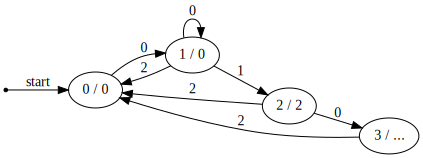

In [3]:
fstMoore = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMoore)
print(fstMoore.toDot())
# print(fstMoore.trFuncDict)
# print(fstMoore.toMdTable())
display(Markdown(fstMoore.toMdTable()))
graphviz.Source(fstMoore.toDot())

digraph fst {
	rankdir=LR;
	node [shape=point]; start;
	node [shape=oval]; "0" [label="0"];
	start -> "0" [label=start];
	node [shape=oval];
	"1" [label="1"];
	"2" [label="2"];
	"3" [label="3"];
	node [style=filled, fillcolor=hotpink];
	"0" -> "1" [label="0 / ..."];
	"1" -> "1" [label="0 / ..."];
	"1" -> "2" [label="1 / 0"];
	"1" -> "0" [label="2 / ..."];
	"2" -> "0" [label="2 / 2"];
	"3" -> "0" [label="2 / ..."];
	"2" -> "3" [label="0 / ..."];
}


| Input \ State | 0 | 1 | 2 | 3 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 / ... | 1 / ... | 3 / ... | ... / ... |
| 1 | ... / 0 | 2 / 0 | ... / ... | ... / ... |
| 2 | ... / ... | 0 / ... | 0 / 2 | 0 / ... |
| 3 | ... / ... | ... / ... | ... / ... | ... / ... |
| 4 | ... / ... | ... / ... | ... / ... | ... / ... |


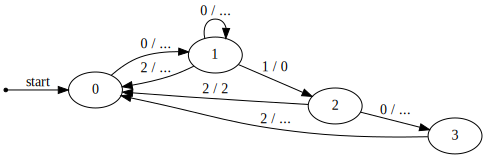

In [4]:
fstMealy = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMealy)
print(fstMealy.toDot())
# print(fstMealy.trFuncDict)
# print(fstMealy.toMdTable())
display(Markdown(fstMealy.toMdTable()))
graphviz.Source(fstMealy.toDot())

In [5]:
display(Markdown(fstMoore.toMdTable()))
display(Markdown(fstMealy.toMdTable()))

| Input \ State | 0 / 0 | 1 / 0 | 2 / 2 | 3 / ... |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 3 | ... |
| 1 | ... | 2 | ... | ... |
| 2 | ... | 0 | 0 | 0 |
| 3 | ... | ... | ... | ... |
| 4 | ... | ... | ... | ... |


| Input \ State | 0 | 1 | 2 | 3 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 / ... | 1 / ... | 3 / ... | ... / ... |
| 1 | ... / 0 | 2 / 0 | ... / ... | ... / ... |
| 2 | ... / ... | 0 / ... | 0 / 2 | 0 / ... |
| 3 | ... / ... | ... / ... | ... / ... | ... / ... |
| 4 | ... / ... | ... / ... | ... / ... | ... / ... |
